In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r'C:\Pauline\Resources\Kaggle\train.csv')
df_test = pd.read_csv(r'C:\Pauline\Resources\Kaggle\test.csv')
df_ss = pd.read_csv(r'C:\Pauline\Resources\Kaggle\sample_submission.csv')

MemoryError: Unable to allocate 512. KiB for an array with shape (65536,) and data type int64

In [ ]:
df_train.shape

In [ ]:
df_train.head()

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
df_ss.shape

In [ ]:
df_ss.head()

In [ ]:
df_train.dtypes


In [ ]:
df_train.isnull().sum()

In [11]:
df_train['Gender'].value_counts()

Male      6228134
Female    5276664
Name: Gender, dtype: int64

In [12]:
df_train['Driving_License'].value_counts()

1    11482041
0       22757
Name: Driving_License, dtype: int64

In [13]:
df_train['Previously_Insured'].value_counts()

0    6178116
1    5326682
Name: Previously_Insured, dtype: int64

In [14]:
df_train['Vehicle_Damage'].value_counts()

Yes    5783229
No     5721569
Name: Vehicle_Damage, dtype: int64

In [15]:
df_train['Response'].value_counts()

0    10089739
1     1415059
Name: Response, dtype: int64

In [16]:
df1 = df_train.drop_duplicates()

In [17]:
df1.shape

(11504798, 12)

## Exploratory Data Analysis

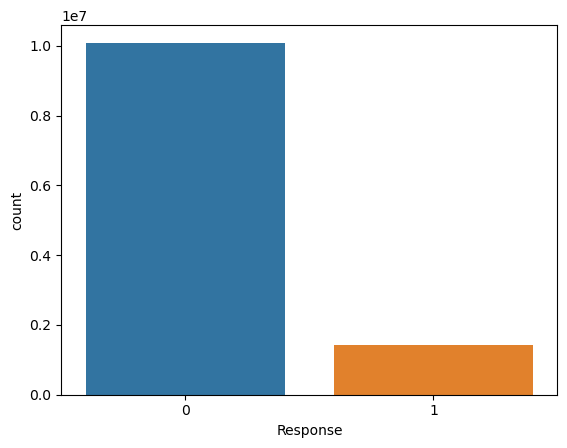

In [23]:
sns.countplot(x ='Response', data = df1)
 
# Show the plot
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

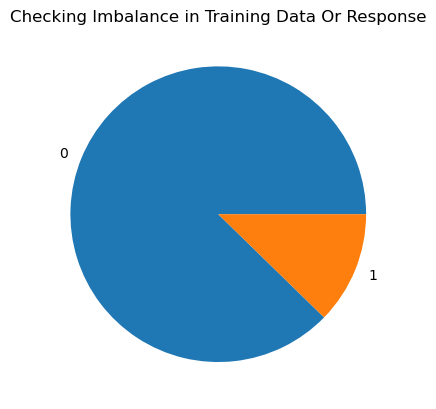

In [24]:
#Checking If training data is Imbalanced
response_data = df1['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')


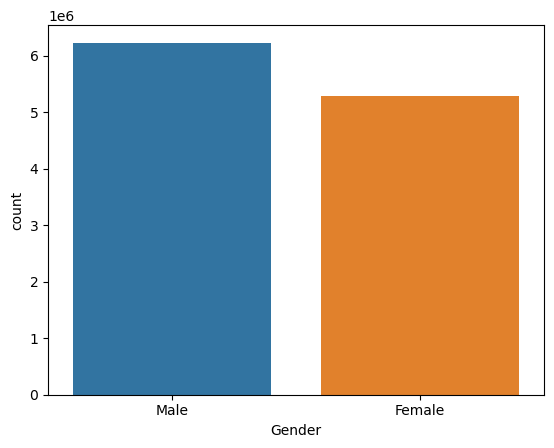

In [25]:
# Distribtion of Gender
sns.countplot(x ='Gender', data = df1)
 
# Show the plot
plt.show()

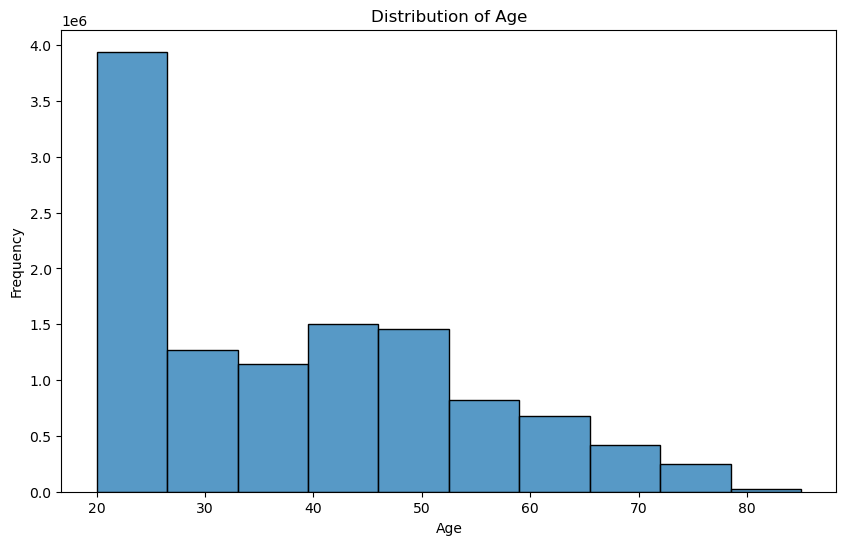

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


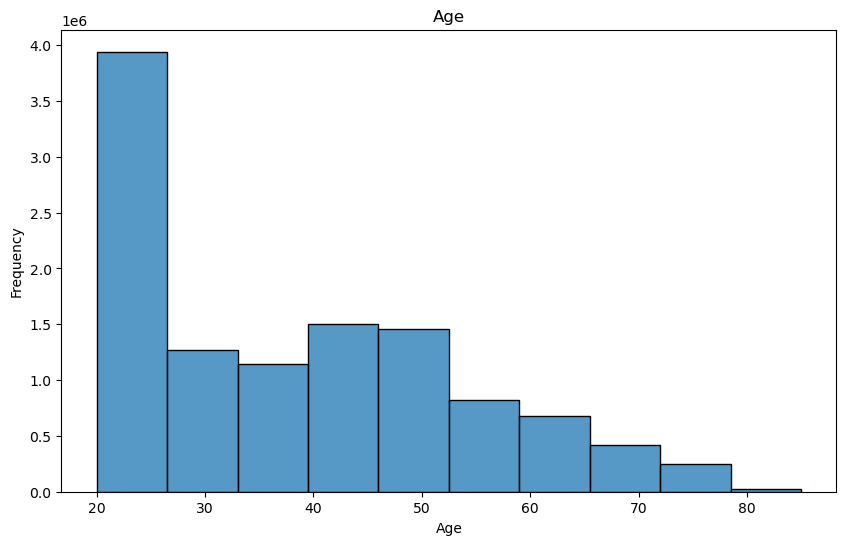

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=False, bins=10)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [28]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

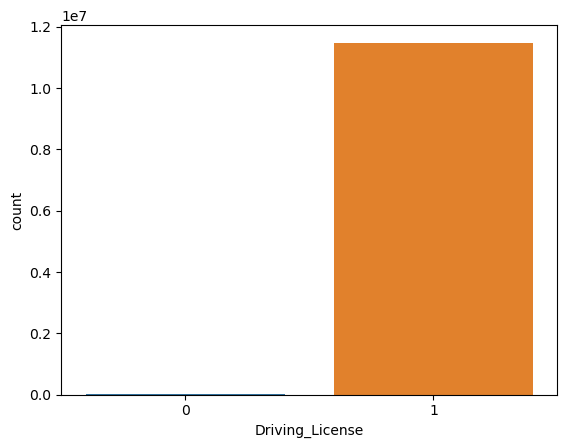

In [29]:
# Distribtion of Gender
sns.countplot(x ='Driving_License', data = df1)
 
# Show the plot
plt.show()

In [30]:
df1['Driving_License'].value_counts()

1    11482041
0       22757
Name: Driving_License, dtype: int64

In [31]:
df1['Previously_Insured'].value_counts()

0    6178116
1    5326682
Name: Previously_Insured, dtype: int64

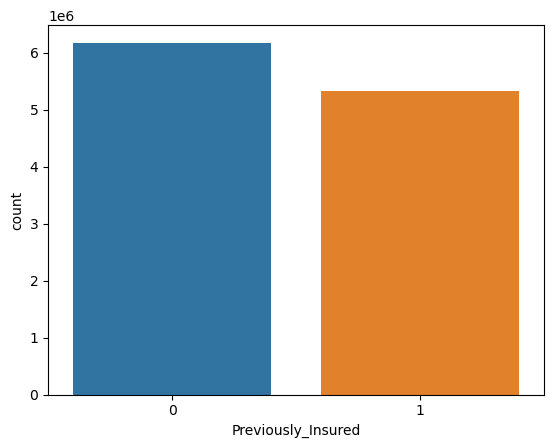

In [32]:
# Distribtion of Gender
sns.countplot(x ='Previously_Insured', data = df1)
 
# Show the plot
plt.show()

In [149]:
# Getting top 10 regions
import pandas as pd

# Filter the data to only include rows where insurance is taken
insurance_taken = df1[df1['Response'] == 1]

# Group by region_code and count the number of insurances taken
region_counts = insurance_taken.groupby('Region_Code').size().reset_index(name='count')

# Sort the regions by the count in descending order and get the top 10
top_10_regions = region_counts.sort_values(by='count', ascending=False).head(5)

# Display the top 10 regions
print(top_10_regions)

    Region_Code   count
28         28.0  661951
8           8.0   89563
41         41.0   63637
46         46.0   55602
29         29.0   39478


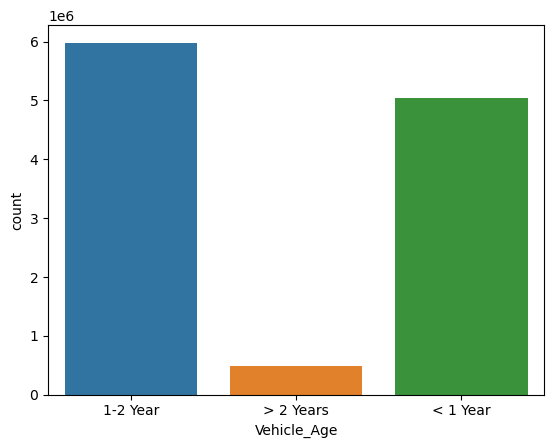

In [35]:
# Distribtion of Vehicle Age
sns.countplot(x ='Vehicle_Age', data = df1)
 
# Show the plot
plt.show()

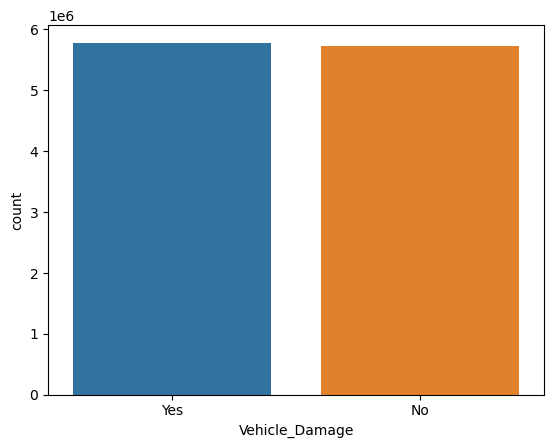

In [36]:
# Distribtion of Vehicle Damage
sns.countplot(x ='Vehicle_Damage', data = df1)
 
# Show the plot
plt.show()

In [37]:
df1['Vehicle_Damage'].value_counts()

Yes    5783229
No     5721569
Name: Vehicle_Damage, dtype: int64

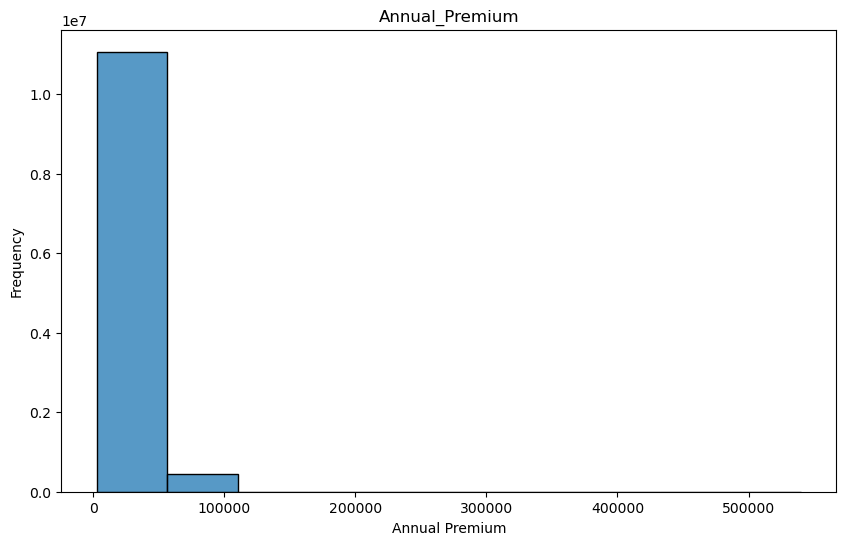

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Annual_Premium'], kde=False, bins=10)
plt.title('Annual_Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()


In [41]:
# Group by the premium column and count the occurrences
premium_counts = df1.groupby('Annual_Premium').size().reset_index(name='count')

# Sort the premiums by the count in descending order and get the top 10
top_10_premiums = premium_counts.sort_values(by='count', ascending=False).head(10)

# Display the top 10 premiums with their counts
print(top_10_premiums)

       Annual_Premium    count
0              2630.0  2112561
21287         38287.0     6363
22006         39008.0     5285
21452         38452.0     4721
11861         28861.0     4671
12056         29056.0     4608
18149         35149.0     4528
12882         29882.0     4481
28155         45179.0     4382
12333         29333.0     4188


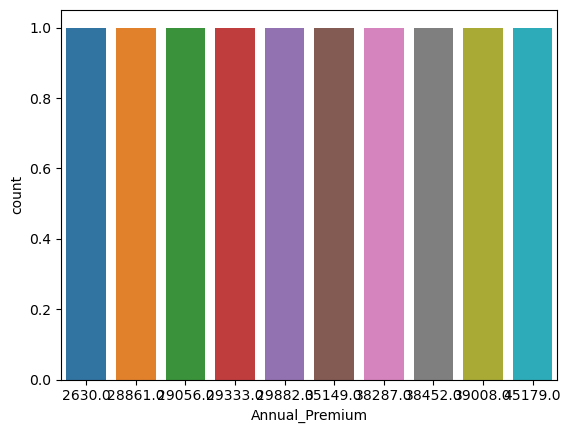

In [44]:
# Distribtion of Vehicle Damage
sns.countplot(x ='Annual_Premium', data = top_10_premiums)
 
# Show the plot
plt.show()

In [42]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [43]:
df1['Policy_Sales_Channel'].value_counts()

152.0    4166183
26.0     2433456
124.0    2264490
160.0     640380
156.0     316693
          ...   
102.0          4
112.0          3
27.0           2
6.0            1
5.0            1
Name: Policy_Sales_Channel, Length: 152, dtype: int64

In [45]:
# Group by the premium column and count the occurrences
policy_sales = df1.groupby('Policy_Sales_Channel').size().reset_index(name='count')

# Sort the premiums by the count in descending order and get the top 10
top_10_policies = policy_sales.sort_values(by='count', ascending=False).head(10)

# Display the top 10 premiums with their counts
print(top_10_policies)

     Policy_Sales_Channel    count
142                 152.0  4166183
25                   26.0  2433456
119                 124.0  2264490
150                 160.0   640380
146                 156.0   316693
117                 122.0   284289
147                 157.0   200672
144                 154.0   170067
141                 151.0   111668
151                 163.0    85299


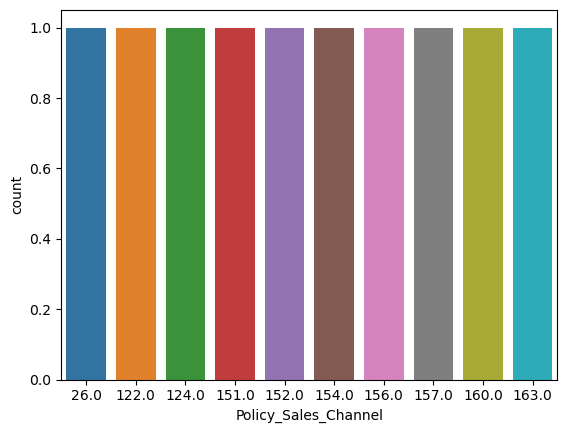

In [46]:
# Distribtion of Vehicle Damage
sns.countplot(x ='Policy_Sales_Channel', data = top_10_policies)
 
# Show the plot
plt.show()

In [47]:
# Group by the premium column and count the occurrences
vintage_counts = df1.groupby('Vintage').size().reset_index(name='count')

# Sort the premiums by the count in descending order and get the top 10
top_10_vintage_period = vintage_counts.sort_values(by='count', ascending=False).head(10)

# Display the top 10 premiums with their counts
print(top_10_vintage_period)

     Vintage  count
177      187  98018
272      282  96377
121      131  91892
246      256  90945
222      232  85183
288      298  82529
93       103  80137
205      215  80054
148      158  80046
241      251  79657


In [48]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
df1['Vehicle_Age'] = df1['Vehicle_Age'].astype('category')
df1 = pd.get_dummies(df1, columns=['Vehicle_Age'])
df1.head()


In [19]:
df1['Gender'].nunique()

2

In [20]:
df1['Gender'] = np.where(df1['Gender'] == 'Male',0,1)

In [21]:
df1['Gender'].value_counts()

0    6228134
1    5276664
Name: Gender, dtype: int64

In [22]:
df1['Vehicle_Damage'].value_counts()

Yes    5783229
No     5721569
Name: Vehicle_Damage, dtype: int64

In [23]:
df1['Vehicle_Damage'] = np.where(df1['Vehicle_Damage'] == 'No',0,1)

In [24]:
df1['Vehicle_Damage'].value_counts()

1    5783229
0    5721569
Name: Vehicle_Damage, dtype: int64

In [25]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [26]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,0,21,1,35.0,0,1,65101.0,124.0,187,0,1,0,0
1,1,0,43,1,28.0,0,1,58911.0,26.0,288,1,0,0,1
2,2,1,25,1,14.0,1,0,38043.0,152.0,254,0,0,1,0
3,3,1,35,1,1.0,0,1,2630.0,156.0,76,0,1,0,0
4,4,1,36,1,15.0,1,0,31951.0,152.0,294,0,1,0,0


In [27]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [56]:
# Splitting Data

In [62]:
X_train = df1[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']]
y_train = df1['Response']


In [63]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())


0    10089739
1     1415059
Name: Response, dtype: int64

0    10089739
1    10089739
Name: Response, dtype: int64


In [64]:
# Scaling the data using min max scaler

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)



In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)


In [67]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(14125634, 12) (14125634,) (6053844, 12) (6053844,)


In [68]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [80]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f1_score1 = f1_score(y_test,x_test_pred)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print(f"F1 score of {model} model is:", f1_score1)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()


Accuracy_Score of LogisticRegression() model on Training Data is: 81.14292781477985
Accuracy_Score of LogisticRegression() model on Testing Data is: 81.13697677046187
Precision Score of LogisticRegression() model is: 0.7574380205931401
Recall Score of LogisticRegression() model is: 0.9160416347267085
AUC Score of LogisticRegression() model is: 0.8934967308023092
F1 score of LogisticRegression() model is: 0.8292240188073148

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


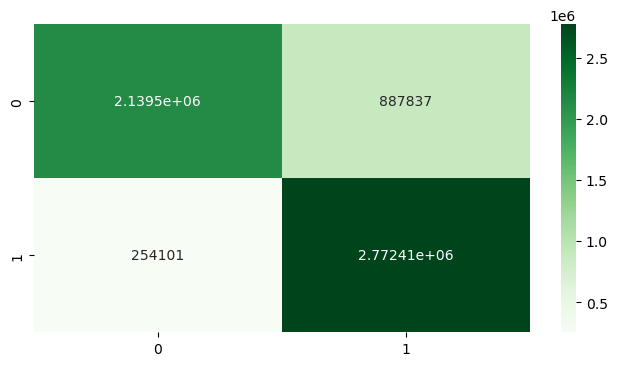

In [81]:
model_prediction(LogisticRegression())


Accuracy_Score of RandomForestClassifier(max_depth=2, random_state=0) model on Training Data is: 79.6862639935312
Accuracy_Score of RandomForestClassifier(max_depth=2, random_state=0) model on Testing Data is: 79.68814525118255
Precision Score of RandomForestClassifier(max_depth=2, random_state=0) model is: 0.7443330033613628
Recall Score of RandomForestClassifier(max_depth=2, random_state=0) model is: 0.9043321156499627
AUC Score of RandomForestClassifier(max_depth=2, random_state=0) model is: 0.8645721092377459
F1 score of RandomForestClassifier(max_depth=2, random_state=0) model is: 0.8165687887926354

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier(max_depth=2, random_state=0) model is:


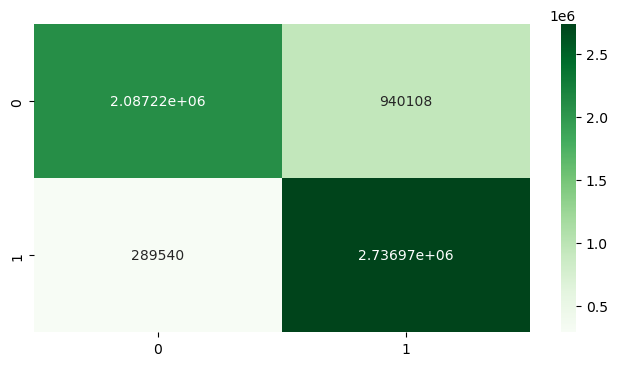

In [82]:
from sklearn.ensemble import RandomForestClassifier
model_prediction(RandomForestClassifier(max_depth=2, random_state=0))


Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 79.86871244150882
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None

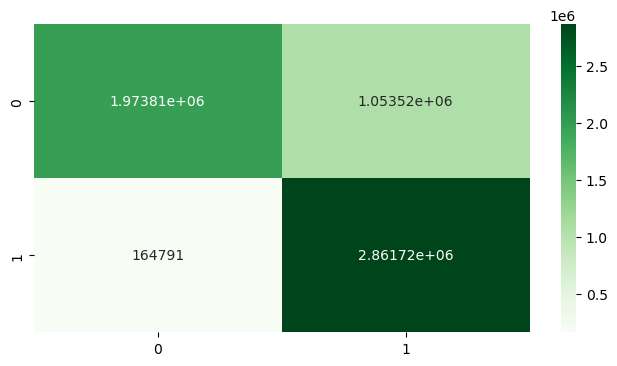

In [83]:
from xgboost import XGBClassifier
model_prediction(XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1))

In [84]:
# Using Test data and predicting

In [85]:
df_test.shape

(7669866, 11)

In [86]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [87]:
df2 = df_test.copy()

In [88]:
df2['Vehicle_Age'] = df2['Vehicle_Age'].astype('category')
df2 = pd.get_dummies(df2, columns=['Vehicle_Age'])
df2.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,Female,20,1,47.0,0,No,2630.0,160.0,228,0,1,0
1,11504799,Male,47,1,28.0,0,Yes,37483.0,124.0,123,1,0,0
2,11504800,Male,47,1,43.0,0,Yes,2630.0,26.0,271,1,0,0
3,11504801,Female,22,1,47.0,1,No,24502.0,152.0,115,0,1,0
4,11504802,Male,51,1,19.0,0,No,34115.0,124.0,148,1,0,0


In [89]:
df2['Gender'] = np.where(df2['Gender'] == 'Male',0,1)

In [90]:
df2['Vehicle_Damage'] = np.where(df2['Vehicle_Damage'] == 'No',0,1)

In [91]:
df2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,1,20,1,47.0,0,0,2630.0,160.0,228,0,1,0
1,11504799,0,47,1,28.0,0,1,37483.0,124.0,123,1,0,0
2,11504800,0,47,1,43.0,0,1,2630.0,26.0,271,1,0,0
3,11504801,1,22,1,47.0,1,0,24502.0,152.0,115,0,1,0
4,11504802,0,51,1,19.0,0,0,34115.0,124.0,148,1,0,0


In [95]:
df2 = df2[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years']]

In [96]:
# Scaling
df_test_scaled = scaler.fit_transform(df2)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)


In [ ]:
# X_train = 

In [97]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_scaled, y_train_smote)

y_pred = logreg.predict(df_test_scaled)



In [98]:
df_test['Response'] = y_pred

In [99]:
df_test.shape

(7669866, 12)

In [100]:
df_test['Response'].value_counts()

1    4116591
0    3553275
Name: Response, dtype: int64

In [101]:
df_test[['id','Response']].head()

,id,Response
0,11504798,1
1,11504799,1
2,11504800,1
3,11504801,0
4,11504802,1


In [102]:
df_sample = df_test[['id','Response']]

In [103]:
df_sample.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file1.csv', index = False)

In [ ]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_scaled, y_train_smote)

y_pred = logreg.predict(df_test_scaled)


In [122]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
# fit the model with data
rfc.fit(X_train_scaled, y_train_smote)

y_pred_rfc = rfc.predict(df_test_scaled)


In [123]:
df_test['Response'] = y_pred_rfc

In [124]:
df_sample_rfc = df_test[['id','Response']]

In [125]:
df_sample_rfc.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file2.csv', index = False)

In [126]:
# XGB

In [127]:
xgbc = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
# fit the model with data
xgbc.fit(X_train_scaled, y_train_smote)

y_pred_xgbc = xgbc.predict(df_test_scaled)


In [128]:
df_test['Response'] = y_pred_xgbc

In [129]:
df_sample_xgbc = df_test[['id','Response']]

In [130]:
df_sample_xgbc.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file3.csv', index = False)

In [104]:
# Trail2

In [105]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,0,21,1,35.0,0,1,65101.0,124.0,187,0,1,0,0
1,1,0,43,1,28.0,0,1,58911.0,26.0,288,1,0,0,1
2,2,1,25,1,14.0,1,0,38043.0,152.0,254,0,0,1,0
3,3,1,35,1,1.0,0,1,2630.0,156.0,76,0,1,0,0
4,4,1,36,1,15.0,1,0,31951.0,152.0,294,0,1,0,0


In [106]:
df1['Age'].max()

85

In [107]:
df1['Age'].min()

20

In [110]:
df1[df1['Age'] == 85].count()

id                       9
Gender                   9
Age                      9
Driving_License          9
Region_Code              9
Previously_Insured       9
Vehicle_Damage           9
Annual_Premium           9
Policy_Sales_Channel     9
Vintage                  9
Response                 9
Vehicle_Age_1-2 Year     9
Vehicle_Age_< 1 Year     9
Vehicle_Age_> 2 Years    9
dtype: int64

In [111]:
# Checking outliers

In [112]:
df1.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,4.586490e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01,5.200159e-01,4.384384e-01,4.154571e-02
std,3.321149e+06,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01,4.995992e-01,4.961957e-01,1.995487e-01
min,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.876199e+06,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.752398e+06,0.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.628598e+06,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.150480e+07,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [113]:
df1['Annual_Premium'].max()

540165.0

In [114]:
df1['Annual_Premium'].min()

2630.0

In [115]:
df1[df1['Annual_Premium'] == 2630].count()

id                       2112561
Gender                   2112561
Age                      2112561
Driving_License          2112561
Region_Code              2112561
Previously_Insured       2112561
Vehicle_Damage           2112561
Annual_Premium           2112561
Policy_Sales_Channel     2112561
Vintage                  2112561
Response                 2112561
Vehicle_Age_1-2 Year     2112561
Vehicle_Age_< 1 Year     2112561
Vehicle_Age_> 2 Years    2112561
dtype: int64

In [116]:
df1[df1['Annual_Premium'] == 540165].count()

id                       78
Gender                   78
Age                      78
Driving_License          78
Region_Code              78
Previously_Insured       78
Vehicle_Damage           78
Annual_Premium           78
Policy_Sales_Channel     78
Vintage                  78
Response                 78
Vehicle_Age_1-2 Year     78
Vehicle_Age_< 1 Year     78
Vehicle_Age_> 2 Years    78
dtype: int64

In [117]:
df1['Vintage'].max()

299

In [118]:
df1['Vintage'].min()

10

In [119]:
df1[df1['Vintage'] == 299].count()

id                       26561
Gender                   26561
Age                      26561
Driving_License          26561
Region_Code              26561
Previously_Insured       26561
Vehicle_Damage           26561
Annual_Premium           26561
Policy_Sales_Channel     26561
Vintage                  26561
Response                 26561
Vehicle_Age_1-2 Year     26561
Vehicle_Age_< 1 Year     26561
Vehicle_Age_> 2 Years    26561
dtype: int64

In [120]:
df1[df1['Vintage'] == 10].count()

id                       25723
Gender                   25723
Age                      25723
Driving_License          25723
Region_Code              25723
Previously_Insured       25723
Vehicle_Damage           25723
Annual_Premium           25723
Policy_Sales_Channel     25723
Vintage                  25723
Response                 25723
Vehicle_Age_1-2 Year     25723
Vehicle_Age_< 1 Year     25723
Vehicle_Age_> 2 Years    25723
dtype: int64

In [131]:
df1['Vintage'].nunique()

290

In [132]:
df1['Vintage'].max()

299

In [133]:
df1['Vintage'].min()

10

In [134]:
# Feature Engineering

In [28]:
df1['Annual_Premium/Age'] = df1['Annual_Premium']/df1['Age']

In [29]:
df1['Annual_Premium/Age'].head()

0    3100.047619
1    1370.023256
2    1521.720000
3      75.142857
4     887.527778
Name: Annual_Premium/Age, dtype: float64

In [30]:
# Vehicle Age & Vintage Period

In [31]:


df1['Vintage<1yr'] = np.where(((df1['Vintage'] >= 190) & (df1['Vintage'] <= 280) 
                              & (df1['Vehicle_Age_< 1 Year'] == 1)), 1, 0)


In [32]:
df1['Vintage<1yr'].value_counts()

0    9716443
1    1788355
Name: Vintage<1yr, dtype: int64

In [33]:
df1['Vintage_1-2_yr'] = np.where(((df1['Vintage'] >= 100) & (df1['Vintage'] < 190) 
                              & (df1['Vehicle_Age_1-2 Year'] == 1)), 1, 0)


In [34]:
df1['Vintage_1-2_yr'].value_counts()

0    9563254
1    1941544
Name: Vintage_1-2_yr, dtype: int64

In [35]:
df1['Vintage_>2yr'] = np.where(((df1['Vintage'] >= 10) & (df1['Vintage'] < 100) 
                              & (df1['Vehicle_Age_> 2 Years'] == 1)), 1, 0)


In [36]:
df1['Vintage1_<1yr'] = np.where(((df1['Vintage'] >= 10) & (df1['Vintage'] < 100) 
                              & (df1['Vehicle_Age_< 1 Year'] == 1)), 1, 0)


In [37]:
df1['Vintage1_>2yr'] = np.where(((df1['Vintage'] >= 190) & (df1['Vintage'] <= 280) 
                              & (df1['Vehicle_Age_> 2 Years'] == 1)), 1, 0)


In [38]:
df1.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium/Age,Vintage<1yr,Vintage_1-2_yr,Vintage_>2yr,Vintage1_<1yr,Vintage1_>2yr
id,1.000000,0.000031,-0.000088,-0.000045,0.000147,0.000217,-0.000184,-0.000205,0.000550,-0.000182,0.000018,-0.000222,0.000098,0.000314,-0.000167,-0.000349,-0.000089,-0.000006,0.000294,0.000685
Gender,0.000031,1.000000,-0.157663,0.018702,0.000106,0.087614,-0.096989,-0.010652,0.116058,0.009535,-0.055212,-0.153958,0.173269,-0.045391,0.091749,0.090149,-0.060002,-0.023646,0.058835,-0.026310
Age,-0.000088,-0.157663,1.000000,-0.078519,0.037041,-0.276248,0.287952,0.056327,-0.591443,-0.013293,0.122134,0.709003,-0.802708,0.220912,-0.517924,-0.389604,0.306512,0.107510,-0.315329,0.127516
Driving_License,-0.000045,0.018702,-0.078519,1.000000,-0.001329,0.013733,-0.015563,-0.007300,0.042941,-0.000697,0.009197,-0.036389,0.039211,-0.006397,0.029748,0.019018,-0.016790,-0.002817,0.015434,-0.004445
Region_Code,0.000147,0.000106,0.037041,-0.001329,1.000000,-0.022367,0.026468,-0.001741,-0.037606,-0.005537,0.012816,0.033113,-0.039125,0.014385,-0.029044,-0.022712,0.016315,0.006860,-0.015751,0.008527
Previously_Insured,0.000217,0.087614,-0.276248,0.013733,-0.022367,1.000000,-0.836214,0.007665,0.236838,0.019431,-0.345930,-0.297395,0.376743,-0.192234,0.209333,0.197670,-0.140340,-0.094403,0.145705,-0.110521
Vehicle_Damage,-0.000184,-0.096989,0.287952,-0.015563,0.026468,-0.836214,1.000000,0.012728,-0.241036,-0.019393,0.359780,0.301506,-0.386688,0.206670,-0.197263,-0.201975,0.142815,0.101429,-0.150307,0.118891
Annual_Premium,-0.000205,-0.010652,0.056327,-0.007300,-0.001741,0.007665,0.012728,1.000000,-0.128559,0.003284,0.032261,-0.012252,-0.009858,0.055188,0.753870,-0.000930,-0.001850,0.025832,-0.010321,0.031552
Policy_Sales_Channel,0.000550,0.116058,-0.591443,0.042941,-0.037606,0.236838,-0.241036,-0.128559,1.000000,0.008999,-0.152733,-0.516030,0.579645,-0.149385,0.274383,0.282171,-0.223567,-0.072341,0.228597,-0.086234
Vintage,-0.000182,0.009535,-0.013293,-0.000697,-0.005537,0.019431,-0.019393,0.003284,0.008999,1.000000,-0.015177,-0.017506,0.019126,-0.003728,0.014163,0.377106,-0.115598,-0.136030,-0.453806,0.102732


In [150]:
# Top 5 regions

In [39]:
# Identify top 5 region codes with the most insurance taken
top_regions = df1[df1['Response'] == 1]['Region_Code'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for region in top_regions:
    df1[f'Region_{region}'] = (df1['Region_Code'] == region).astype(int)


In [40]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Annual_Premium/Age',
       'Vintage<1yr', 'Vintage_1-2_yr', 'Vintage_>2yr', 'Vintage1_<1yr',
       'Vintage1_>2yr', 'Region_28.0', 'Region_8.0', 'Region_41.0',
       'Region_46.0', 'Region_29.0'],
      dtype='object')

In [41]:
df1['Region_28.0'].value_counts()

0    8053736
1    3451062
Name: Region_28.0, dtype: int64

In [42]:
df1['Policy_Sales_Channel'].value_counts()

152.0    4166183
26.0     2433456
124.0    2264490
160.0     640380
156.0     316693
          ...   
102.0          4
112.0          3
27.0           2
6.0            1
5.0            1
Name: Policy_Sales_Channel, Length: 152, dtype: int64

In [ ]:
# Identify top 5 policy sales channel with the most insurance taken
top_channels = df1[df1['Response'] == 1]['Policy_Sales_Channel'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for channel in top_channels:
    df1[f'Channel_{channel}'] = (df1['Policy_Sales_Channel'] == channel).astype(int)


In [44]:
# Identify top 5 vintage with the most insurance taken
top_vintage = df1[df1['Response'] == 1]['Vintage'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for vintage in top_vintage:
    df1[f'Vintage_{vintage}'] = (df1['Vintage'] == vintage).astype(int)


In [45]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Annual_Premium/Age',
       'Vintage<1yr', 'Vintage_1-2_yr', 'Vintage_>2yr', 'Vintage1_<1yr',
       'Vintage1_>2yr', 'Region_28.0', 'Region_8.0', 'Region_41.0',
       'Region_46.0', 'Region_29.0', 'Channel_26.0', 'Channel_124.0',
       'Channel_152.0', 'Channel_156.0', 'Channel_157.0', 'Vintage_215',
       'Vintage_34', 'Vintage_282', 'Vintage_84', 'Vintage_165'],
      dtype='object')

In [46]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,...,Channel_26.0,Channel_124.0,Channel_152.0,Channel_156.0,Channel_157.0,Vintage_215,Vintage_34,Vintage_282,Vintage_84,Vintage_165
0,0,0,21,1,35.0,0,1,65101.0,124.0,187,...,0,1,0,0,0,0,0,0,0,0
1,1,0,43,1,28.0,0,1,58911.0,26.0,288,...,1,0,0,0,0,0,0,0,0,0
2,2,1,25,1,14.0,1,0,38043.0,152.0,254,...,0,0,1,0,0,0,0,0,0,0
3,3,1,35,1,1.0,0,1,2630.0,156.0,76,...,0,0,0,1,0,0,0,0,0,0
4,4,1,36,1,15.0,1,0,31951.0,152.0,294,...,0,0,1,0,0,0,0,0,0,0


In [47]:
df2 = df1.copy()

In [48]:
df2 = df1.drop(columns = ['Region_Code', 'Policy_Sales_Channel', 'Vintage'], axis = 1)

In [49]:
df2.shape

(11504798, 32)

In [50]:
df2.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Annual_Premium/Age',
       'Vintage<1yr', 'Vintage_1-2_yr', 'Vintage_>2yr', 'Vintage1_<1yr',
       'Vintage1_>2yr', 'Region_28.0', 'Region_8.0', 'Region_41.0',
       'Region_46.0', 'Region_29.0', 'Channel_26.0', 'Channel_124.0',
       'Channel_152.0', 'Channel_156.0', 'Channel_157.0', 'Vintage_215',
       'Vintage_34', 'Vintage_282', 'Vintage_84', 'Vintage_165'],
      dtype='object')

In [164]:
# heatmap

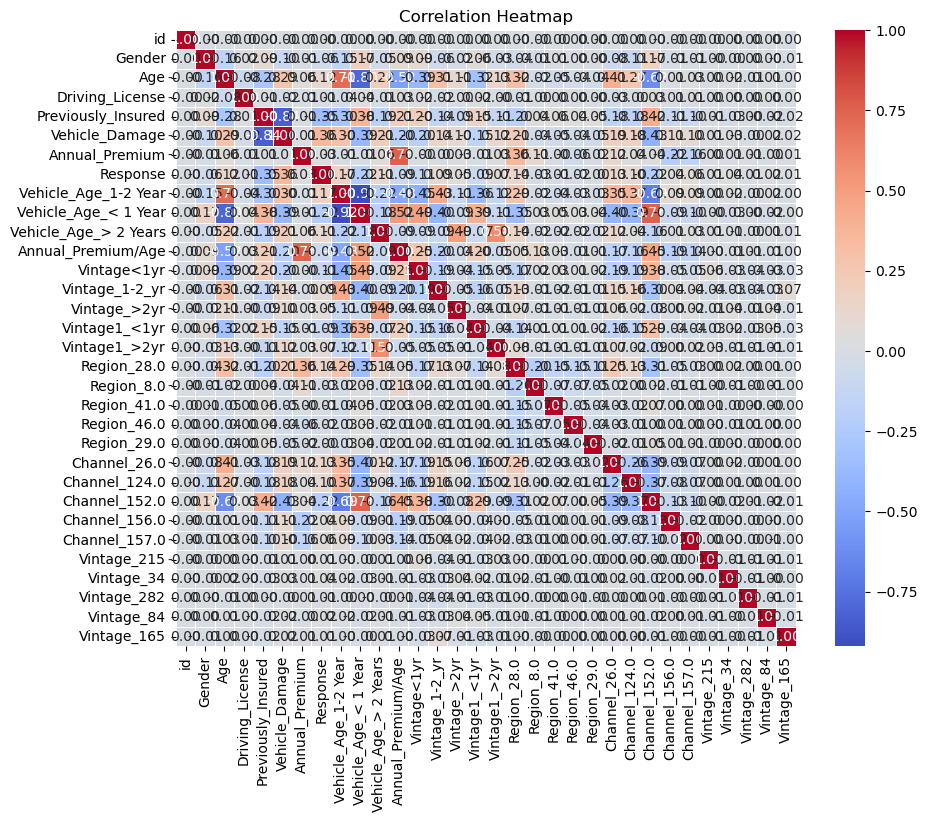

In [165]:
corr = df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [166]:
# Model Training

In [167]:
# Smote

In [168]:
df2.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Annual_Premium/Age',
       'Vintage<1yr', 'Vintage_1-2_yr', 'Vintage_>2yr', 'Vintage1_<1yr',
       'Vintage1_>2yr', 'Region_28.0', 'Region_8.0', 'Region_41.0',
       'Region_46.0', 'Region_29.0', 'Channel_26.0', 'Channel_124.0',
       'Channel_152.0', 'Channel_156.0', 'Channel_157.0', 'Vintage_215',
       'Vintage_34', 'Vintage_282', 'Vintage_84', 'Vintage_165'],
      dtype='object')

In [60]:
X = df2[['Gender', 'Age', 'Driving_License', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Annual_Premium/Age',
       'Vintage<1yr', 'Vintage_1-2_yr', 'Vintage_>2yr', 'Vintage1_<1yr',
       'Vintage1_>2yr', 'Region_28.0', 'Region_8.0', 'Region_41.0',
       'Region_46.0', 'Region_29.0', 'Channel_26.0', 'Channel_124.0',
       'Channel_152.0', 'Channel_156.0', 'Channel_157.0', 'Vintage_215',
       'Vintage_34', 'Vintage_282', 'Vintage_84', 'Vintage_165']]
y = df2['Response']


In [61]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)
print(y.value_counts())
print()
print(y_smote.value_counts())


MemoryError: Unable to allocate 1.94 GiB for an array with shape (8674680, 30) and data type float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.3, random_state=42)


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


In [ ]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f1_score1 = f1_score(y_test,x_test_pred)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print(f"F1 score of {model} model is:", f1_score1)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()


In [ ]:
model_prediction(LogisticRegression())


In [ ]:
model_prediction(RandomForestClassifier(max_depth=2, random_state=0))

In [ ]:
model_prediction(XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1))

In [ ]:
# Using the original test data for prediction

In [ ]:
# Test data preperation

In [ ]:
df3 = df_test.copy()

In [ ]:
# Feature Engineering

In [ ]:
df3['Vehicle_Age'] = df3['Vehicle_Age'].astype('category')
df3 = pd.get_dummies(df3, columns=['Vehicle_Age'])
df3.head()


In [ ]:
df3['Gender'] = np.where(df3['Gender'] == 'Male',0,1)
df3['Vehicle_Damage'] = np.where(df3['Vehicle_Damage'] == 'No',0,1)
df3.head()

In [ ]:
# Feature Engineering

In [ ]:
df3['Annual_Premium/Age'] = df3['Annual_Premium']/df3['Age']

In [ ]:
df3['Vintage<1yr'] = np.where(((df3['Vintage'] >= 190) & (df3['Vintage'] <= 280) 
                              & (df3['Vehicle_Age_< 1 Year'] == 1)), 1, 0)
df3['Vintage_1-2_yr'] = np.where(((df3['Vintage'] >= 100) & (df3['Vintage'] < 190) 
                              & (df3['Vehicle_Age_1-2 Year'] == 1)), 1, 0)
df3['Vintage_>2yr'] = np.where(((df3['Vintage'] >= 10) & (df3['Vintage'] < 100) 
                              & (df3['Vehicle_Age_> 2 Years'] == 1)), 1, 0)
df3['Vintage1_<1yr'] = np.where(((df3['Vintage'] >= 10) & (df3['Vintage'] < 100) 
                              & (df3['Vehicle_Age_< 1 Year'] == 1)), 1, 0)
df3['Vintage1_>2yr'] = np.where(((df3['Vintage'] >= 190) & (df3['Vintage'] <= 280) 
                              & (df3['Vehicle_Age_> 2 Years'] == 1)), 1, 0)


In [ ]:
# Top 5

In [ ]:
# Identify top 5 region codes with the most insurance taken
top_regions = df3[df3['Response'] == 1]['Region_Code'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for region in top_regions:
    df3[f'Region_{region}'] = (df3['Region_Code'] == region).astype(int)


In [ ]:
# Identify top 5 policy sales channel with the most insurance taken
top_channels = df3[df3['Response'] == 1]['Policy_Sales_Channel'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for channel in top_channels:
    df3[f'Channel_{channel}'] = (df3['Policy_Sales_Channel'] == channel).astype(int)


In [ ]:
# Identify top 5 vintage with the most insurance taken
top_vintage = df3[df3['Response'] == 1]['Vintage'].value_counts().nlargest(5).index

# Create separate columns for each of the top region codes
for vintage in top_vintage:
    df3[f'Vintage_{vintage}'] = (df3['Vintage'] == vintage).astype(int)


In [ ]:
df3.columns

In [ ]:
# dropping columns

In [ ]:
df4 = df3.drop(columns = ['id','Region_Code', 'Policy_Sales_Channel', 'Vintage'], axis = 1)

In [ ]:
# Scaling

In [ ]:
X_scaled_test = scaler.fit_transform(df4)


In [ ]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_scaled, y_smote)

y_pred = logreg.predict(X_scaled_test)


In [ ]:
df_test['Response'] = y_pred

In [ ]:
df_test_lg = df_test[['id','Response']]

In [ ]:
df_test_lg.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file2_lg.csv', index = False)

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
# fit the model with data
rfc.fit(X_scaled, y_smote)

y_pred_rfc = rfc.predict(X_scaled_test)


In [ ]:
df_test['Response'] = y_pred_rfc

In [ ]:
df_test_rfc = df_test[['id','Response']]

In [ ]:
df_test_rfc.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file2_rfc.csv', index = False)

In [ ]:
xgbc = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1)
# fit the model with data
xgbc.fit(X_scaled, y_smote)

y_pred_xgbc = xgbc.predict(X_scaled_test)


In [ ]:
df_test['Response'] = y_pred_xgbc

In [ ]:
df_test_xgbc = df_test[['id','Response']]

In [ ]:
df_test_xgbc.to_csv(r'C:\Pauline\Resources\Kaggle\submission_file2_xgbc.csv', index = False)